Support Vector Machine
https://www.kaggle.com/code/nirajvermafcb/support-vector-machine-detail-analysis

Categprocal Features
https://www.youtube.com/watch?v=0w78CHM_ubM&t=3s

How do I encode categorical features using scikit-learn?
https://www.youtube.com/watch?v=irHhDMbw3xo

Udemy Jan1

## One Hot Encoding (OHE)

https://github.com/raytroop/FeatureEngineering/blob/master/Course-Notebooks/10.1_One_hot_encoding.ipynb

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
cols = ['customer_id', 'loan_purpose', 'employment', 'householder']

data = pd.read_csv("../Udemy/loan.csv", usecols = cols).sample(10000, random_state=44)

In [33]:
data.head()

,customer_id,employment,householder,loan_purpose
3472,3472,Teacher,RENT,Debt consolidation
5095,5095,Dentist,MORTGAGE,Debt consolidation
9504,9504,Taxi driver,MORTGAGE,Other
5786,5786,Bus driver,MORTGAGE,Other
8758,8758,Dentist,RENT,Debt consolidation


In [34]:
data.shape

(10000, 4)

In [40]:
data.employment.unique()

array(['Teacher', 'Dentist', 'Taxi driver', 'Bus driver', 'Statistician',
       nan, 'Accountant', 'Software developer', 'Secretary',
       'Civil Servant', 'Nurse', 'Other'], dtype=object)

In [41]:
data.householder.unique()

array(['RENT', 'MORTGAGE', 'OWNER'], dtype=object)

In [42]:
data.loan_purpose.unique()

array(['Debt consolidation', 'Other', 'Home improvements', 'Car purchase',
       'Moving home', 'Health', 'Holidays', 'Wedding'], dtype=object)

In [31]:
data1.head()

,customer_id,loan_purpose,employment,householder
0,0,Debt consolidation,Teacher,RENT
1,1,Car purchase,Accountant,OWNER
2,2,Debt consolidation,Statistician,RENT
3,3,Debt consolidation,Other,RENT
4,4,Debt consolidation,Bus driver,RENT


<AxesSubplot:>

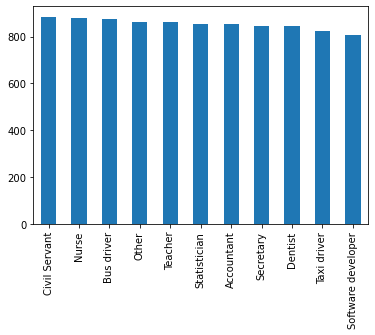

In [62]:
data['employment'].value_counts().plot(kind='bar')


<AxesSubplot:>

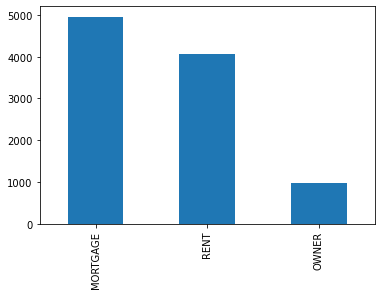

In [64]:
data['householder'].value_counts().plot(kind='bar')

<AxesSubplot:>

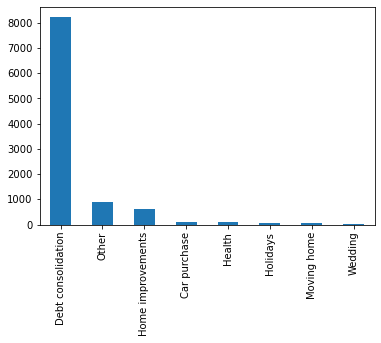

In [65]:
data['loan_purpose'].value_counts().plot(kind='bar')

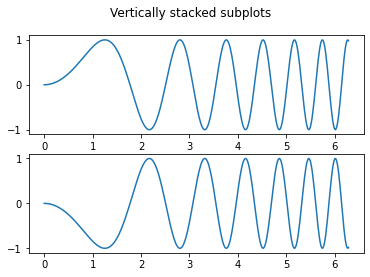

In [77]:

import numpy as np
fig, axs = plt.subplots(2)
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)

In [70]:
for i in data.columns:
    print(i)

customer_id
employment
householder
loan_purpose


In [53]:
x = data['employment'].unique()
x

array(['Teacher', 'Dentist', 'Taxi driver', 'Bus driver', 'Statistician',
       nan, 'Accountant', 'Software developer', 'Secretary',
       'Civil Servant', 'Nurse', 'Other'], dtype=object)

In [79]:
data['customer_id'].head()

3472    3472
5095    5095
9504    9504
5786    5786
8758    8758
Name: customer_id, dtype: int64

In [81]:
len(data['customer_id'].unique())

10000

In [85]:
titanic = pd.read_csv('../datasets/titanic/test.csv', usecols=['Sex'])

In [86]:
titanic.head()

,Sex
0,male
1,female
2,male
3,male
4,female


In [88]:
# one hot encoding
pd.get_dummies(titanic).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [93]:
# for better visualization
pd.concat([titanic, pd.get_dummies(titanic)], axis=1).head()

,Sex,Sex_female,Sex_male
0,male,0,1
1,female,1,0
2,male,0,1
3,male,0,1
4,female,1,0


## pd.concat



In [94]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

In [95]:
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

## obtain k-1 labels

In [96]:
pd.get_dummies(titanic, drop_first=True).head()

,Sex_male
0,1
1,0
2,1
3,1
4,0


In [102]:
data = pd.read_csv('../datasets/titanic/test.csv', usecols=['Embarked'])
data.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [103]:
pd.get_dummies(data).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [104]:
pd.get_dummies(data, drop_first=True, dummy_na=True).head()

,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0


In [109]:
pd.get_dummies(data, drop_first=True, dummy_na=True).sum(axis=0)

Embarked_Q       46
Embarked_S      270
Embarked_nan      0
dtype: int64

### One hot encoding into k-1:
One hot encoding into k-1 binary variables takes into account that we can use 1 less dimension and still represent the whole information: if the observation is 0 in all the binary variables, then it must be 1 in the final (removed) binary variable. As an example, for the variable gender encoded into male, if the observation is 0, then it has to be female. We do not need the additional female variable to explain that.

One hot encoding with k-1 binary variables should be used in linear regression, to keep the correct number of degrees of freedom (k-1). The linear regression has access to all of the features as it is being trained, and therefore examines altogether the whole set of dummy variables. This means that k-1 binary variables give the whole information about (represent completely) the original categorical variable to the linear regression.

And the same is true for all machine learning algorithms that look at ALL the features at the same time during training. For example, support vector machines and neural networks as well. And clustering algorithms.

### One hot encoding into k dummy variables
However, tree based models select at each iteration only a group of features to make a decision. This is to separate the data at each node. Therefore, the last category, the one that was removed in the one hot encoding into k-1 variables, would only be taken into account by those splits or even trees, that use the entire set of binary variables at a time. And this would rarely happen, because each split usually uses 1-3 features to make a decision. So, tree based methods will never consider that additional label, the one that was dropped. Thus, if the categorical variables will be used in a tree based learning algorithm, it is good practice to encode it into k binary variables instead of k-1.

Finally, if you are planning to do feature selection, you will also need the entire set of binary variables (k) to let the machine learning model select which ones have the most predictive power.

In [110]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

/Users/moritayasushieda/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [153]:
data = pd.read_csv('../datasets/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
# let's make a copy of the dataset, in which we encode the categorical variable

data_OHE = pd.concat([data[['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']],
                    pd.get_dummies(data.Sex, drop_first=True),
                    pd.get_dummies(data.Embarked, drop_first=True)],axis=1)                                

In [155]:
data_OHE.head()

,Pclass,Age,SibSp,Parch,Survived,male,Q,S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1


In [165]:
data_OHE.Survived.shape

(889,)

In [157]:
data_OHE.isna().sum()

Pclass        0
Age         177
SibSp         0
Parch         0
Survived      0
male          0
Q             0
S             0
dtype: int64

In [158]:
data_OHE.Age.median()

28.0

In [159]:
data_OHE.Age.fillna(28, inplace=True)

In [160]:
data_OHE.Age.isna().sum()

0

In [166]:
data_OHE_target = data_OHE[['Survived']]
data_OHE_target.shape

(889, 1)

In [173]:
data_OHE = data_OHE.drop(columns = 'Survived')

In [174]:
data_OHE_target.shape

(889, 1)

In [175]:
data_OHE.shape

(889, 7)

In [176]:
# let's separate into train and test set
X_train, X_test, y_train, y_test =train_test_split(data_OHE, data_OHE_target, test_size=0.3, random_state=0)

In [177]:
X_train.shape, X_test.shape

((622, 7), (267, 7))

In [178]:
# lets build a random forest

rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=3)
rf.fit(X_train, y_train)
print('Train set')
pred = rf.predict_proba(X_train)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = rf.predict_proba(X_test)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))


<ipython-input-178-3b0197d1ce35>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Train set
Random Forests roc-auc: 0.869855364732414
Test set
Random Forests roc-auc: 0.8724075197089144


In [179]:
# and now an AdaBoost classifier

ada = AdaBoostClassifier(n_estimators=200, random_state=44)
ada.fit(X_train, y_train)
print('Train set')
pred = ada.predict_proba(X_train)
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = ada.predict_proba(X_test)
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

/Users/moritayasushieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train set
AdaBoost roc-auc: 0.8995251105906843
Test set
AdaBoost roc-auc: 0.8638568829593694


In [180]:
# and finally a logistic regression

logit = LogisticRegression(random_state=44)
logit.fit(X_train, y_train)
print('Train set')
pred = logit.predict_proba(X_train)
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = logit.predict_proba(X_test)
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

/Users/moritayasushieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train set
Logistic Regression roc-auc: 0.8507188394483477
Test set
Logistic Regression roc-auc: 0.8711036992116434


One Hot encoding: final notes
Advantages
Straightforward to implement
Makes no assumption
Keeps all the information of the categorical variable
Disadvantages
Does not add any information that may make the variable more predictive
If the variable has loads of categories, then OHE increases the feature space dramatically

In [183]:
# Lets experience the disadvantage...

# load the variable cabin of the titanic dataset

data = pd.read_csv('../datasets/titanic/train.csv', usecols = ['Cabin'])

In [185]:
data.head()

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN


In [189]:
# number of labels

len(data.Cabin.unique())

148

In [190]:
Cabin_OHE = pd.get_dummies(data.Cabin)
Cabin_OHE.shape

(891, 147)

In [191]:
Cabin_OHE.head()

,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
